## Q1

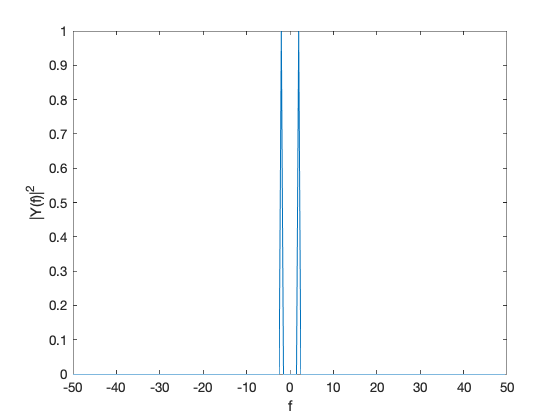

In [6]:
dx = 0.01;
L = 2;
x = dx:dx:L;
f = 3;
% Y = fftshift(fft(sin(2*pi*f*x)));
Nq = 0.5/dx;
freqs = -Nq: 1/L : Nq-1/L;
Y = zeros(size(freqs));
Y(freqs == -2 | freqs ==2) = 1;
plot(freqs, abs(Y).^2)
xlabel('f')
ylabel('|Y(f)|^2')

## Q2

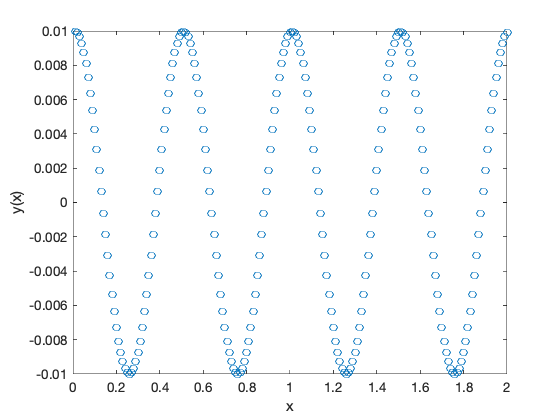

In [7]:
y = ifft(ifftshift(Y), 'symmetric');
plot(x, y, 'o')
xlabel('x')
ylabel('y(x)')

## Q3

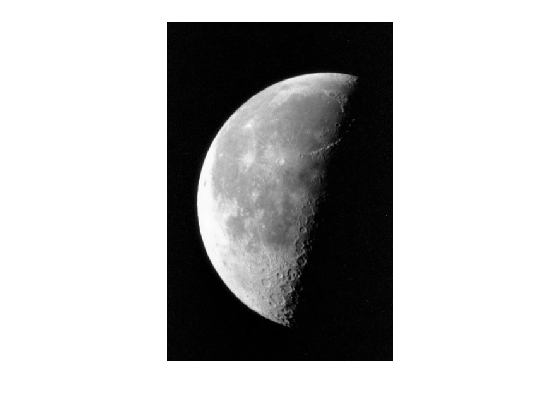

In [1]:
moon = imread('moon.tif');
imshow(moon)

In [11]:
[Ly, Lx] = size(moon);
Nqx = 0.5; Nqy = 0.5;
fx = -Nqx: 1/Lx: Nqx-1/Lx;
fy = -Nqy+0.5/Ly : 1/Ly : Nqy-0.5/Ly;

## Q4

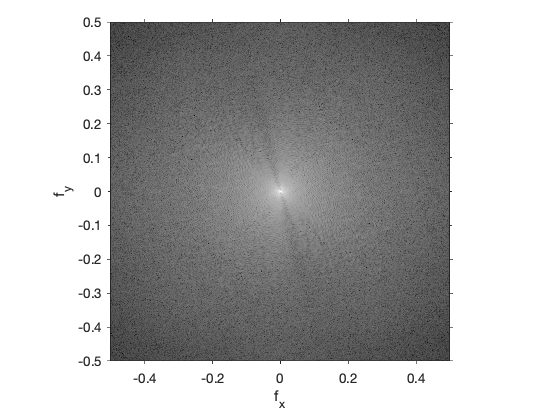

In [5]:
[Ly, Lx] = size(moon);
Nqx = 0.5; Nqy = 0.5;
fx = -Nqx: 1/Lx: Nqx-1/Lx;
fy = -Nqy+0.5/Ly : 1/Ly : Nqy-0.5/Ly;

M = fftshift(fft2(moon));
imshow(mat2gray(log10(abs(M).^2)), 'XData', fx, 'YData', fy)
% imshow(log10(abs(M).^2), 'XData', fx, 'YData', fy)
axis on; xlabel('f_x'); ylabel('f_y')
set(gca, 'YDir', 'normal')


## Q5

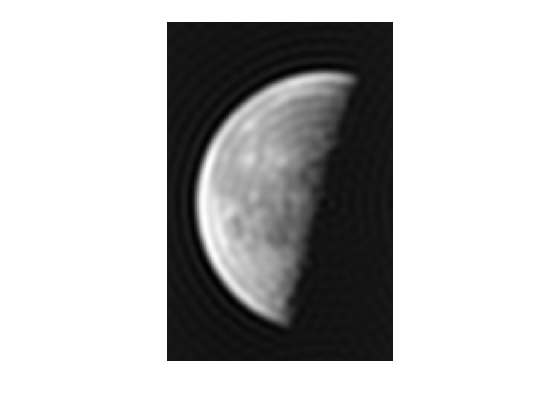

In [26]:
M = fftshift(fft2(moon));
[Mfx, Mfy] = meshgrid(fx, fy);
radius = 0.05;
C = zeros(size(M));
C((Mfx.^2 + Mfy.^2) < radius^2) = 1;
mcircle = ifft2(ifftshift(M.*C), 'symmetric');
imshow(mat2gray(mcircle))

## Q6

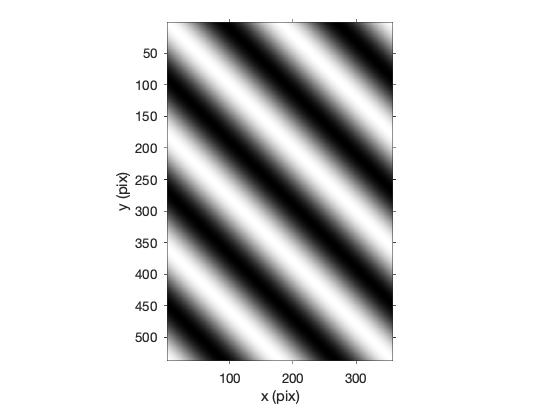

In [58]:
[Ly, Lx] = size(moon);
Nqx = 0.5; Nqy = 0.5;
fx = -Nqx: 1/Lx: Nqx-1/Lx;
fy = -Nqy+0.5/Ly : 1/Ly : Nqy-0.5/Ly;

M = fftshift(fft2(moon));
[Ly, Lx] = size(moon);
u = int32(-Lx/2 : Lx/2-1);
v = int32(-(Ly-1)/2 : (Ly-1)/2);
[Mu,Mv] = meshgrid(u,v);
bx=2;by=-3;
uvplane = zeros(size(M));
uvplane(Mu == bx & Mv == by) = 1;
uvplane(Mu == -bx & Mv == -by) = 1;
rsp_function = ifft2(ifftshift(uvplane), 'symmetric');
imshow(mat2gray(rsp_function))
axis on;
xlabel('x (pix)')
ylabel('y (pix)')

## Q7

In Young’s double-slit experiment, the fringe spacing decreases as the slits move further apart, and also when a shorter wavelength is used. This means that you can improve the resolution of a 2-element interferometer by moving the receivers further apart, and/or observing at a higher radio frequency (shorter wavelength).

## Q8

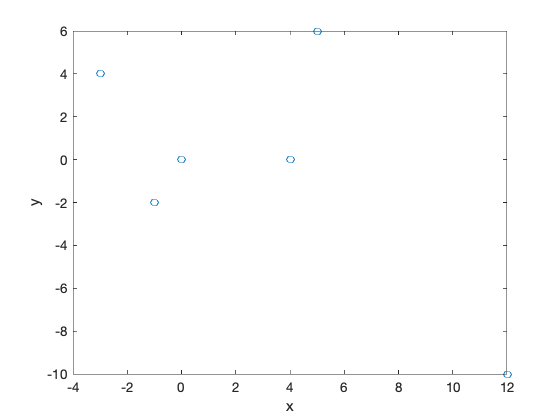

In [33]:
x = [0, 12, -1, -3, 4, 5];
y = [0, -10, -2, 4, 0, 6]; 
plot(x, y, 'o')
xlabel('x')
ylabel('y')

## Q9

In [31]:
%%file fillUVplane.m
function uv = fillUVplane(x, y)
% Takes a list of receiver coordinates and fills a u,v-plane of appropriate
% dimensions (size of the 'moon.tif' image).

    Lx = 358; Ly = 537;
    Fx = int32(-Lx/2 : Lx/2-1);
    Fy = int32(-(Ly-1)/2 : (Ly-1)/2);
    [MFx, MFy] = meshgrid(Fx, Fy);

    n = length(x);       % number of receivers
    N = n*(n-1)/2;       % number of baseline vectors
    bx = zeros(N,1);     % x-component of baseline vector
    by = zeros(N,1);     % y-component of baseline vector

    % Loop over every pair of points
    k = 0;
    for i = 1:n
        for j = i+1:n
            k = k + 1;
            bx(k) = x(j) - x(i);
            by(k) = y(j) - y(i);
        end
    end

    % Concatenate the negation
    bx = [bx; -bx];
    by = [by; -by];

    uv = zeros(Ly,Lx);
    for i = 1:length(bx)
        uv(MFx == bx(i) & MFy == by(i)) = 1;
    end

end


Created file '/Users/rzhu/Documents/PhD/Computational_Lab/Lab7/fillUVplane.m'.


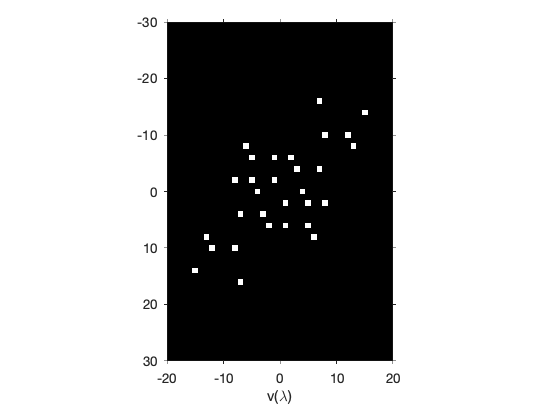

In [49]:
u = int32(-Lx/2 : Lx/2-1);
v = int32(-(Ly-1)/2 : (Ly-1)/2); 
uv = fillUVplane(x, y);
imshow(uv, 'XData', u, 'YData', v)
xlim([-20, 20]);
ylim([-30, 30]);
axis on
xlabel('u(\lambda)')
xlabel('v(\lambda)')

## Q10

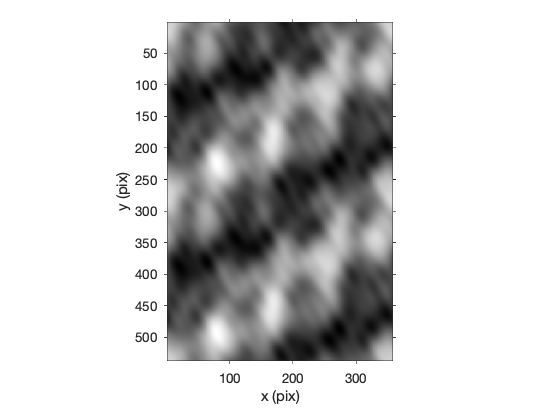

In [51]:
moon6 = ifft2(ifftshift(M.*uv), 'symmetric');
imshow(mat2gray(moon6))
axis on;
xlabel('x (pix)')
ylabel('y (pix)')

## Q11

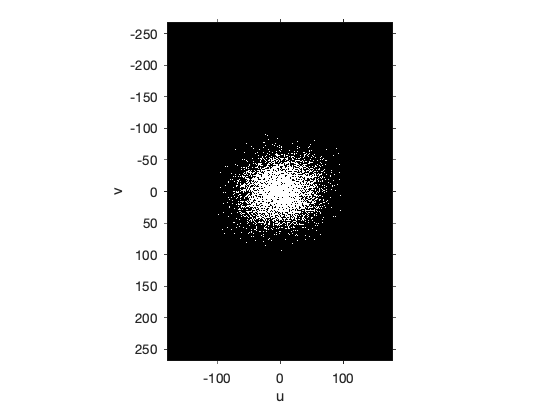

In [56]:
x = int32(round(20*randn(128,1)+Lx/2));
y = int32(round(20*randn(128,1)+Ly/2));
x(x<1)=1;x(x>Lx)=Lx;
y(y<1)=1;y(y>Ly)=Ly;
uv = fillUVplane(x, y);
imshow(uv, 'XData', u, 'YData', v)
axis on;
xlabel('u')
ylabel('v')

## Q12

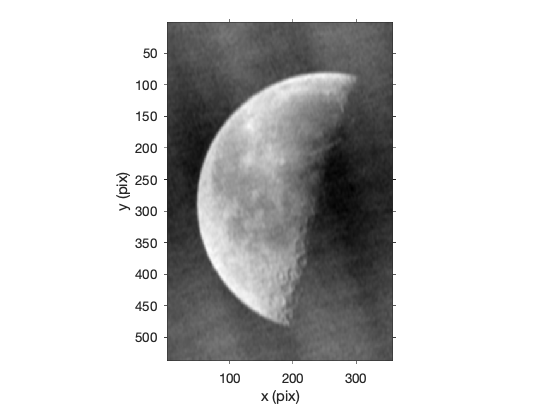

In [59]:
moon128 = ifft2(ifftshift(M.*uv), 'symmetric');
imshow(mat2gray(moon128))
axis on;
xlabel('x (pix)')
ylabel('y (pix)')

## Q13

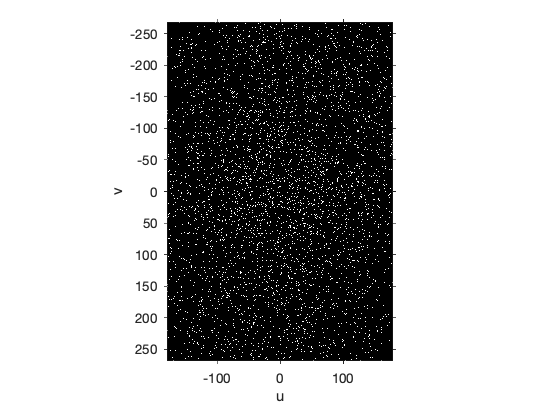

In [60]:
x = randi([1,Lx], 128, 1);
y = randi([1,Ly], 128, 1);
uv = fillUVplane(x, y);
imshow(uv, 'XData', u, 'YData', v)
axis on;
xlabel('u')
ylabel('v')

## Q14

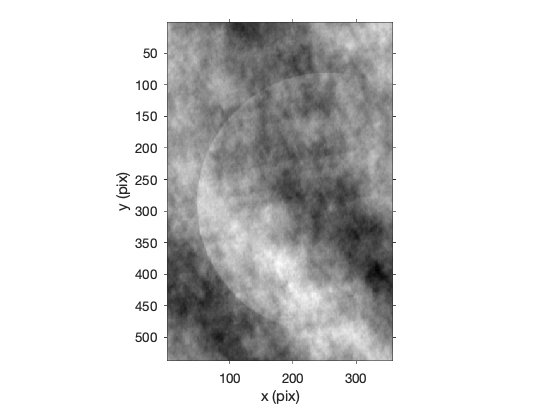

In [62]:
moon128_unif = ifft2(ifftshift(M.*uv), 'symmetric'); 
imshow(mat2gray(moon128_unif))
axis on;
xlabel('x (pix)')
ylabel('y (pix)')

## Q15

A centrally-condensed configuration is much more sensitive to smaller spatial frequencies, i.e. large-scale structure on the sky, than an interferometer spread out over a much larger area. The Moon is a large object and is therefore built mainly from small spatial frequencies, so it is imaged more accurately by a centrally-condensed array. On the other hand, interferometers with many long baselines are very sensitive to small-scale structure, as evidenced by the very sharp edge of the Moon when imaged with the more spread-out array. Point-like objects like pulsars would therefore be easier to detect with a spread-out array.